## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [1]:
import pandas as pd

df = pd.read_csv('data/github_bot_processed_data.csv')

print("打印df的形状：")
print(df.shape)

print("打印df：")
print(df)

print("打印df的前五行：")
print(df.head())

print("打印df的统计信息：")
print(df.describe())

D:\programs\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


打印df的形状：
(19768, 15)
打印df：
       label  type  site_admin  company   blog  location  hireable  \
0      Human  True       False    False  False     False     False   
1      Human  True       False    False   True     False      True   
2      Human  True       False     True   True      True      True   
3        Bot  True       False    False  False      True     False   
4      Human  True       False    False  False     False      True   
...      ...   ...         ...      ...    ...       ...       ...   
19763    Bot  True       False     True   True      True     False   
19764  Human  True       False    False  False     False     False   
19765  Human  True       False     True  False      True     False   
19766  Human  True       False     True  False     False     False   
19767    Bot  True       False    False  False      True     False   

                                                     bio  public_repos  \
0                                                    NaN  

2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。

In [2]:
print("数据集的前几行：")
print(df.head())

数据集的前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6

In [3]:
print("数据集的基本信息：")
print(df.info())

数据集的基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None


两者的区别：

head()显示数据集前几行，默认5行

info()则会显示数据集的基本结构和每列的统计信息

In [4]:
print("数据统计信息：")
print(df.describe())

数据统计信息：
       public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000


3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [5]:
#日期格式化
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df['updated_at'] = pd.to_datetime(df['updated_at']).dt.strftime('%Y-%m-%d')

#数值列百分数处理
df['followers'] = df['followers'].apply(lambda x: f"{x:,}")
df['following'] = df['following'].apply(lambda x: f"{x:,}")
df['public_repos'] = df['public_repos'].apply(lambda x: f"{x:,}")

df['engagement_rate'] = (
    df['followers'].str.replace(",", "").astype(float) / 
    df['following'].str.replace(",", "").astype(float)
).replace([float('inf'), -float('inf')], 0)  # 处理除零错误
df['engagement_rate'] = df['engagement_rate'].fillna(0).apply(lambda x: f"{x:.2%}")

print(df.head())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio public_repos  \
0                                                NaN           26   
1  I just press the buttons randomly, and the pro...           30   
2         Time is unimportant,\nonly life important.          103   
3                                                NaN           49   
4                                                NaN           11   

   public_gists followers following  created_at  updated_at  text_bot_count  \
0             1         5         1  2011-09-26  2023-10-13               0   
1             3         9     

4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [6]:
import numpy as np
from IPython.display import display

log_transformed_data = df.copy()

# 将需要变换的列转换为数值类型（去掉格式化后的逗号）
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    # 如果列已是数字类型则跳过转换
    if log_transformed_data[col].dtype == 'object':
        log_transformed_data[col] = log_transformed_data[col].str.replace(",", "").astype(float)


for col in columns_to_transform:
    log_transformed_data[f'log_{col}'] = np.log1p(log_transformed_data[col])

transformed_columns = [f'log_{col}' for col in columns_to_transform]
log_transformed_subset = log_transformed_data[transformed_columns]

# 在 Notebook 中展示
display(log_transformed_subset.head())

,log_public_repos,log_public_gists,log_followers,log_following
0,3.295837,0.693147,1.791759,0.693147
1,3.433987,1.386294,2.302585,1.945910
2,4.644391,3.912023,7.100852,5.402677
3,3.912023,0.000000,4.442651,1.098612
4,2.484907,0.693147,1.945910,1.098612


5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。

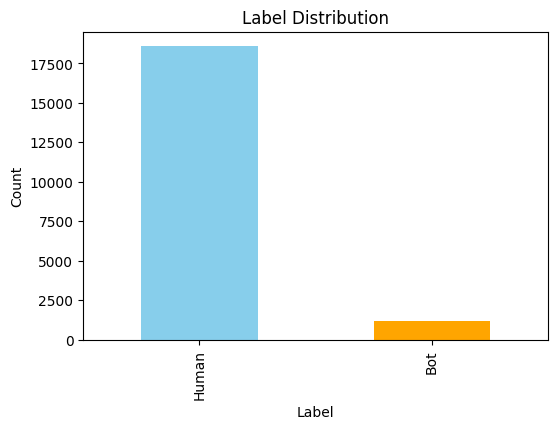

In [7]:
# 绘制条形图：展示label列的类别分布
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
log_transformed_data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

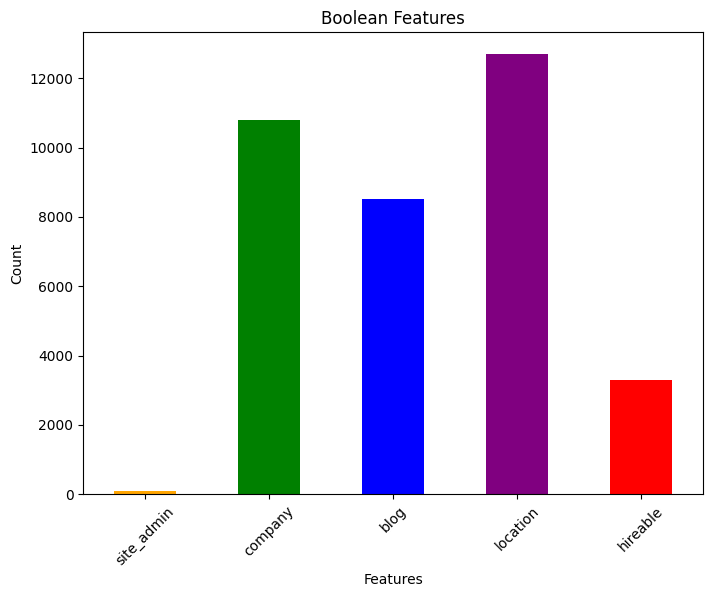

In [8]:
# 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。

bool_columns = ['site_admin', 'company', 'blog', 'location', 'hireable']
stacked_data = log_transformed_data[bool_columns].astype(int)

stacked_data.sum().plot(kind='bar', stacked=True, figsize=(8, 6), color=['orange', 'green', 'blue', 'purple', 'red'])
plt.title('Boolean Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

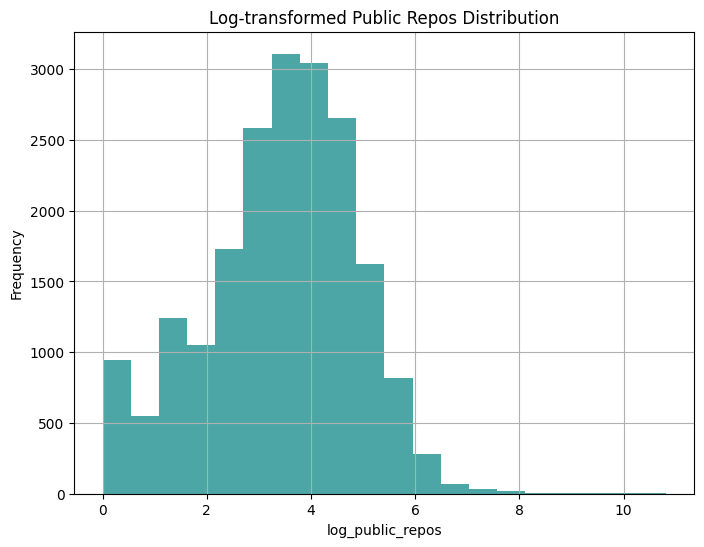

In [9]:
#  绘制直方图：展示log_public_repos的对数变换后的数据分布。
log_transformed_data['log_public_repos'] = np.log1p(log_transformed_data['public_repos'])

plt.figure(figsize=(8, 6))
plt.hist(log_transformed_data['log_public_repos'], bins=20, color='teal', alpha=0.7)
plt.title('Log-transformed Public Repos Distribution')
plt.xlabel('log_public_repos')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

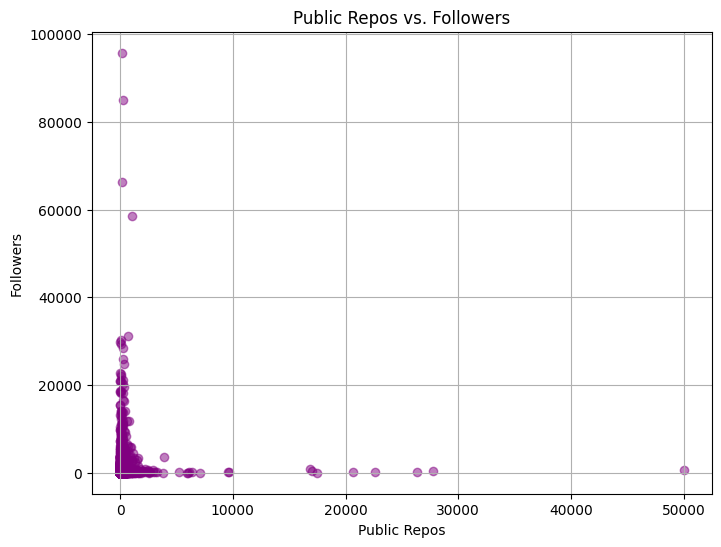

In [10]:
#  绘制散点图：展示public_repos与followers之间的关系。
plt.figure(figsize=(8, 6))
plt.scatter(
    log_transformed_data['public_repos'], 
    log_transformed_data['followers'], 
    alpha=0.5, c='purple'
)
plt.title('Public Repos vs. Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

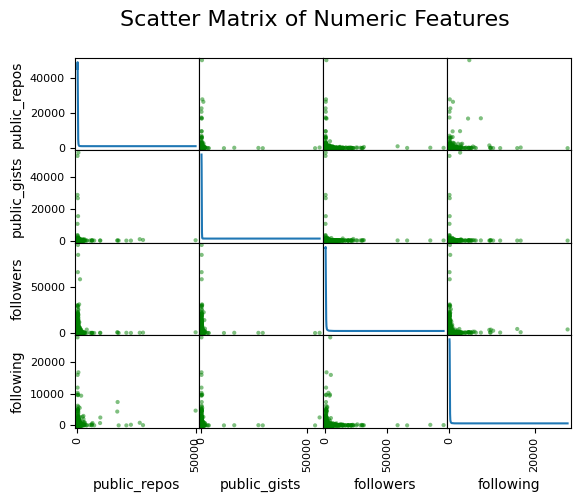

In [11]:
#  绘制散点矩阵：展示多个数值型特征之间的成对关系。
from pandas.plotting import scatter_matrix

numeric_cols = ['public_repos', 'public_gists', 'followers', 'following']
for col in numeric_cols:
    log_transformed_data[col] = log_transformed_data[col].replace(",", "", regex=True).astype(float)
    
for col in numeric_cols:
    log_transformed_data[f'log_{col}'] = np.log1p(log_transformed_data[col])

plt.figure(figsize=(10, 8))
scatter_matrix(log_transformed_data[numeric_cols], alpha=0.5, diagonal='kde', color='green')
plt.suptitle('Scatter Matrix of Numeric Features', fontsize=16)
plt.show()

6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。

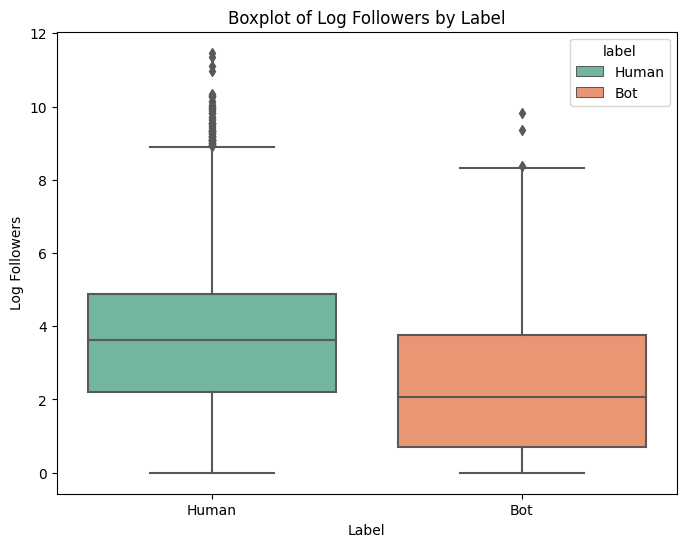

In [12]:
# 绘制箱线图：展示不同label类别下log_followers的分布。
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='label', 
    y='log_followers', 
    data=log_transformed_data, 
    hue='label',  # 设置 hue 为 'label' 符合 Seaborn 的要求
    palette='Set2',
    dodge=False  # 关闭分组效果以保持单一颜色
)
plt.title('Boxplot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

D:\programs\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\programs\anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\programs\anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like,

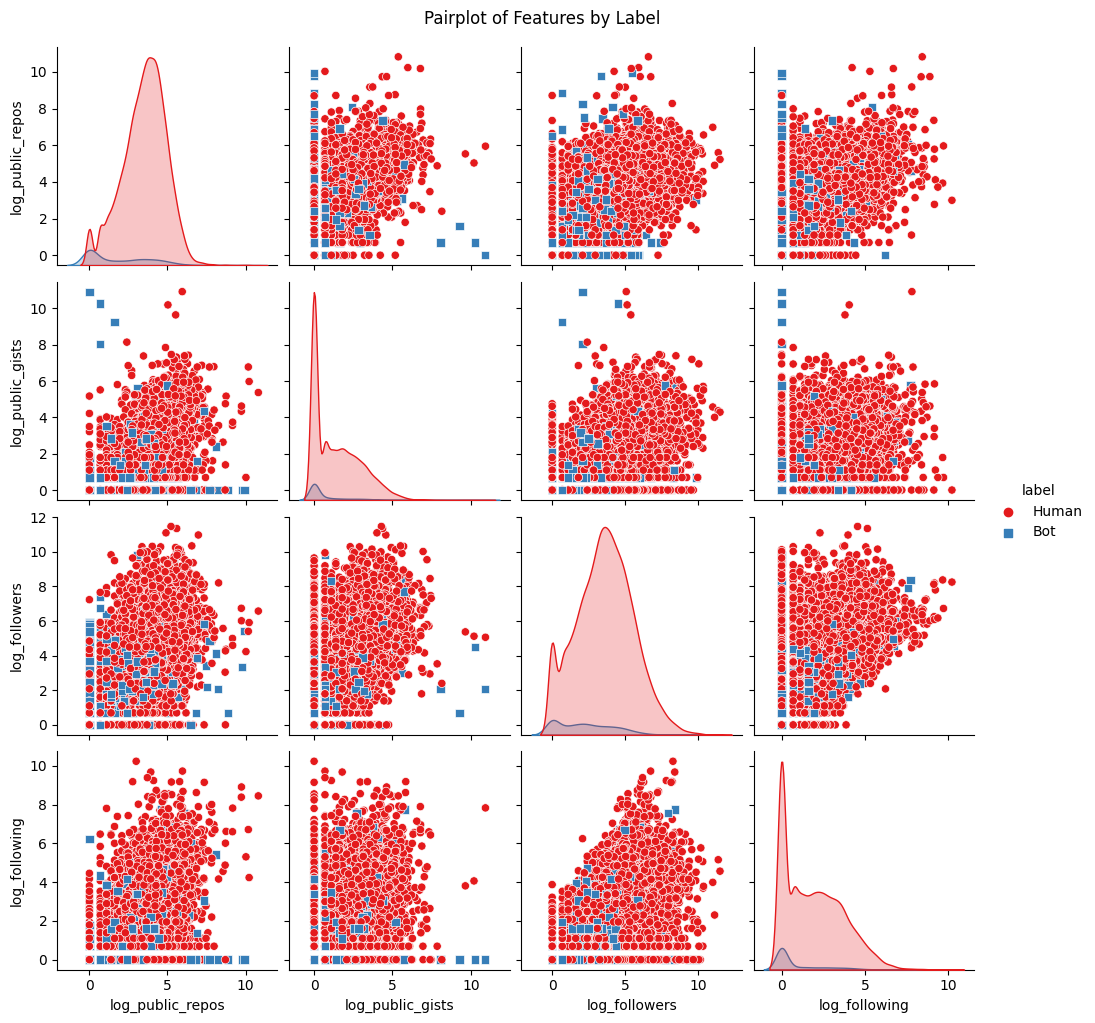

In [13]:
# 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
pair_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(
    log_transformed_data[pair_features + ['label']], 
    hue='label', 
    palette='Set1', 
    diag_kind='kde', 
    markers=["o", "s"]
)
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()

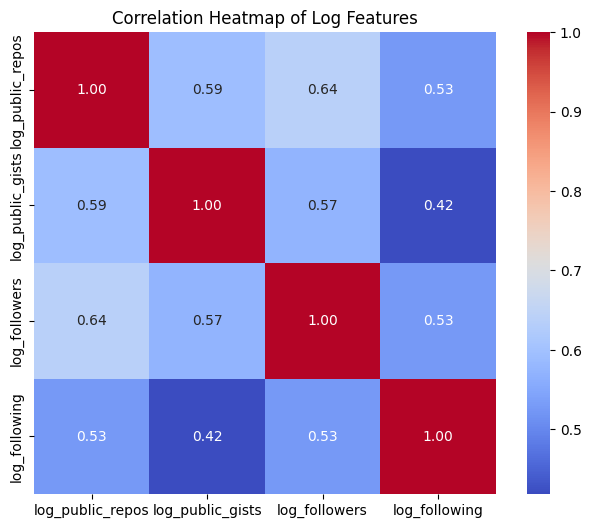

In [14]:
# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
correlation_matrix = log_transformed_data[pair_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Log Features')
plt.show()

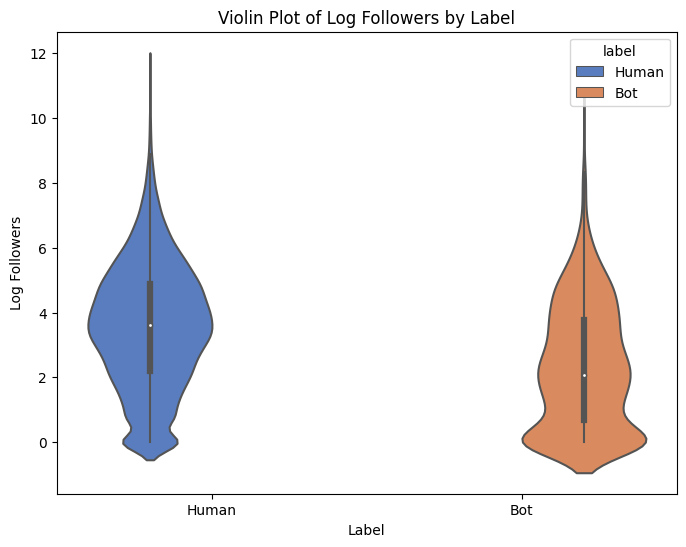

In [18]:
# 绘制小提琴图：展示label与log_followers之间的分布差异。
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='label',
    y='log_followers',
    data=log_transformed_data,
    hue='label',  # 添加分类信息
    palette='muted', 
)
plt.title('Violin Plot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [19]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='hw8result', explorative=True)
profile.to_file('result.html')

D:\programs\anaconda\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]